In [605]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings 
warnings.filterwarnings('ignore')

In [606]:
df = pd.read_csv('erasmus.csv')

In [607]:
df.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [608]:
df.isnull().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [609]:
df['INDEX']

0        1
1        2
2        3
3        4
4        5
      ... 
336    337
337    338
338    339
339    340
340    341
Name: INDEX, Length: 341, dtype: int64

In [610]:
df['INDEX'].value_counts()[:20]

INDEX
1      1
226    1
234    1
233    1
232    1
231    1
230    1
229    1
228    1
227    1
225    1
215    1
224    1
223    1
222    1
221    1
220    1
219    1
218    1
217    1
Name: count, dtype: int64

In [611]:
df['INDEX'].isnull().sum()

0

In [612]:
df['DEPARTMENTS']

0                    ENGLISH LANGUAGE AND LITERATURE
1                                          SOCIOLOGY
2                                         PSYCHOLOGY
3                            NUTRITION AND DIETETICS
4                    ENGLISH LANGUAGE AND LITERATURE
                           ...                      
336    POLITICAL SCIENCE AND INTERNATIONAL RELATIONS
337                                CIVIL ENGINEERING
338                            INTERNATIONAL FINANCE
339             ADVERTISING DESIGN AND COMMUNICATION
340                                         MEDICINE
Name: DEPARTMENTS, Length: 341, dtype: object

In [613]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

     INDEX COUNTRIES                                  UNIVERSITIES  \
216    217     DUTCH  STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM   
245    246    FRANCE                     CY CERGY PARIS UNIVERSITE   

                                         FACULTIES DEPARTMENTS  EXAM SCORE  \
216   FACULTY OF COMPUTER AND INFORMATION SCIENCES         NaN       76.92   
245   FACULTY OF COMPUTER AND INFORMATION SCIENCES         NaN       74.27   

     GRANT  
216      0  
245      0  


In [614]:
df.replace('0', np.nan)  

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
...,...,...,...,...,...,...,...
336,337,DUTCH,UNIVERSITEIT MAASTRICHT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13,0
337,338,POLAND,KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY,FACULTY OF ENGINEERING,CIVIL ENGINEERING,61.63,0
338,339,BELGIUM,HOGESCHOOL GENT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,INTERNATIONAL FINANCE,59.93,0
339,340,DUTCH,STİCHTİNG HANZEHOGESCHOOL GRONİNGEN,FACULTY OF COMMUNICATION,ADVERTISING DESIGN AND COMMUNICATION,56.58,0


In [615]:
df.drop([216, 245], inplace=True)

In [616]:
df.isnull().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

In [617]:
df['COUNTRIES']

0       ITALIA
1       ITALIA
2       GERMAN
3       GERMAN
4       ITALIA
        ...   
336      DUTCH
337     POLAND
338    BELGIUM
339      DUTCH
340     GERMAN
Name: COUNTRIES, Length: 339, dtype: object

In [618]:
df['COUNTRIES'].isnull().sum()

0

In [619]:
df['UNIVERSITIES']

0            UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA
1          ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA
2                                UNIVERSITAET BIELEFELD
3      HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG
4           UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA 
                             ...                       
336                             UNIVERSITEIT MAASTRICHT
337      KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY
338                                     HOGESCHOOL GENT
339                 STİCHTİNG HANZEHOGESCHOOL GRONİNGEN
340             JULIUS-MAXIMILIANS-UNIVERSITAT WURZBURG
Name: UNIVERSITIES, Length: 339, dtype: object

In [620]:
df['UNIVERSITIES'].isnull().sum()

0

In [621]:
df['FACULTIES']

0                          FACULTY OF ARTS AND SCIENCES
1                          FACULTY OF ARTS AND SCIENCES
2                          FACULTY OF ARTS AND SCIENCES
3                            FACULTY OF HEALTH SCIENCES
4                          FACULTY OF ARTS AND SCIENCES
                             ...                       
336    FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES
337                              FACULTY OF ENGINEERING
338    FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES
339                            FACULTY OF COMMUNICATION
340                                 FACULTY OF MEDICINE
Name: FACULTIES, Length: 339, dtype: object

In [622]:
df['FACULTIES'].isnull().sum()

0

In [623]:
df['EXAM SCORE']

0      98.50
1      97.10
2      96.80
3      96.50
4      96.32
       ...  
336    62.13
337    61.63
338    59.93
339    56.58
340    51.40
Name: EXAM SCORE, Length: 339, dtype: float64

In [624]:
df['average_exam_scores'] = df['EXAM SCORE'].mean()

In [625]:
df['correlation'] = df['EXAM SCORE'].corr(df['GRANT'])

In [626]:
df[['average_exam_scores', 'correlation']].sample(20)

,average_exam_scores,correlation
143,79.159853,0.719974
333,79.159853,0.719974
220,79.159853,0.719974
318,79.159853,0.719974
298,79.159853,0.719974
185,79.159853,0.719974
251,79.159853,0.719974
49,79.159853,0.719974
98,79.159853,0.719974
51,79.159853,0.719974


In [627]:
df['EXAM SCORE'].isnull().sum()

0

In [628]:
df['GRANT']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    0
Name: GRANT, Length: 339, dtype: int64

In [629]:
df['average_grant_count'] = df['GRANT'].mean()

In [630]:
df[['average_grant_count']].sample(20)

,average_grant_count
256,0.436578
266,0.436578
294,0.436578
34,0.436578
231,0.436578
59,0.436578
240,0.436578
187,0.436578
211,0.436578
96,0.436578


In [631]:
df['GRANT'].isnull().sum()

0

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 340
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INDEX                339 non-null    int64  
 1   COUNTRIES            339 non-null    object 
 2   UNIVERSITIES         339 non-null    object 
 3   FACULTIES            339 non-null    object 
 4   DEPARTMENTS          339 non-null    object 
 5   EXAM SCORE           339 non-null    float64
 6   GRANT                339 non-null    int64  
 7   average_exam_scores  339 non-null    float64
 8   correlation          339 non-null    float64
 9   average_grant_count  339 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 29.1+ KB


In [633]:
df.columns

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT', 'average_exam_scores', 'correlation',
       'average_grant_count'],
      dtype='object')

In [634]:
df_analyst = df[['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
                 'EXAM SCORE', 'GRANT', 'average_exam_scores', 'correlation', 'average_grant_count']]

df_analyst.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT,average_exam_scores,correlation,average_grant_count
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1,79.159853,0.719974,0.436578
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1,79.159853,0.719974,0.436578
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1,79.159853,0.719974,0.436578
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1,79.159853,0.719974,0.436578
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1,79.159853,0.719974,0.436578


In [635]:
df_analyst.describe()

,INDEX,EXAM SCORE,GRANT,average_exam_scores,correlation,average_grant_count
count,339.000000,339.000000,339.000000,3.390000e+02,3.390000e+02,3.390000e+02
mean,170.643068,79.159853,0.436578,7.915985e+01,7.199736e-01,4.365782e-01
std,98.757156,8.585522,0.496694,3.273328e-13,6.337626e-15,2.446101e-15
min,1.000000,51.400000,0.000000,7.915985e+01,7.199736e-01,4.365782e-01
25%,85.500000,73.560000,0.000000,7.915985e+01,7.199736e-01,4.365782e-01
50%,170.000000,79.320000,0.000000,7.915985e+01,7.199736e-01,4.365782e-01
75%,256.500000,85.325000,1.000000,7.915985e+01,7.199736e-01,4.365782e-01
max,341.000000,98.500000,1.000000,7.915985e+01,7.199736e-01,4.365782e-01


In [636]:
df_analyst['COUNTRIES'].value_counts()[:20]

COUNTRIES
GERMAN            67
DUTCH             62
POLAND            45
SPAIN             26
ITALIA            24
FRANCE            23
BELGIUM           13
AUSTRIA           13
HUNGARY           11
ROMANIA           10
PORTUGUESE         7
LITHUANIA          7
GREECE             5
DENMARK            5
CZECH REPUBLIC     4
SLOVENIA           3
SWEDISH            3
IRELAND            3
FINLAND            3
CROATIA            3
Name: count, dtype: int64

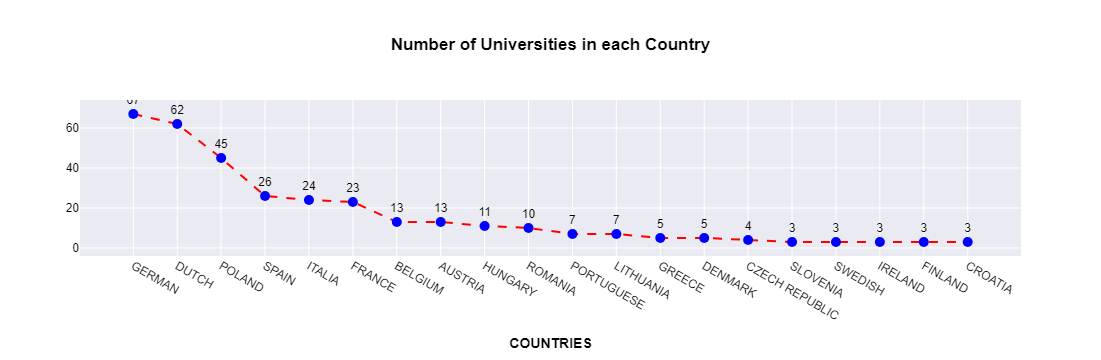

In [637]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x= df_analyst['COUNTRIES'].value_counts()[:20].index,
    y= df_analyst['COUNTRIES'].value_counts()[:20].values,
    name='Number of Universities in each Countries',
    mode='markers+text+lines',
    marker_color='blue',
    marker_size=10,
    text=df_analyst['COUNTRIES'].value_counts()[:20].values,
    textposition='top center',
    line=dict(color='red',dash='dash'),

))

fig.update_layout(
    title= "<b>Number of Universities in each Country</b>",
    xaxis_title="<b>COUNTRIES</b>",
    template='seaborn',
    font=dict(
        size=12,
        color="Black",
        family="Oswald, sans-serif"
        ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    yaxis2=dict(showgrid=True,overlaying='y',side='right',title='<b>Number of Universities in each Country</b>'),
    legend=dict(yanchor='top',
    y=1.3,
    xanchor="left",
    x=0.78)
)
fig.show()

### As Shown in the plot This graphic clearly shows a comprehensive view of the Number of Universities in each country. The use of markers, lines, and text annotations helps in clearly identifying each data point, making it easier to compare the number of universities across countries.

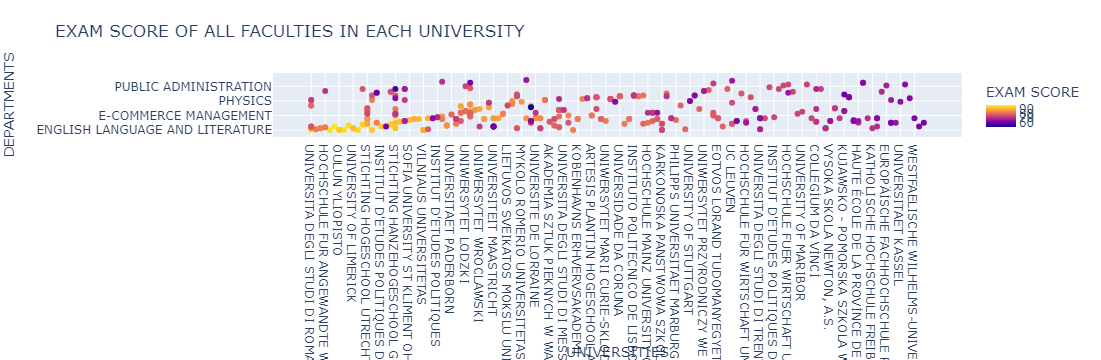

In [638]:
fig = px.scatter(df_analyst, x="UNIVERSITIES", y="DEPARTMENTS",
                 color="EXAM SCORE",
                 hover_data=['COUNTRIES', 'FACULTIES'],
                 title= "EXAM SCORE OF ALL FACULTIES IN EACH UNIVERSITY")

fig.show()

### Overall, this scatter plot offers a thorough view of exam scores across departments at several universities. In educational contexts, it improves data-driven decision-making, shows performance trends, as well as makes comparison analysis easier. people can use these insights to promote academic success and enhance learning outcomes in general.

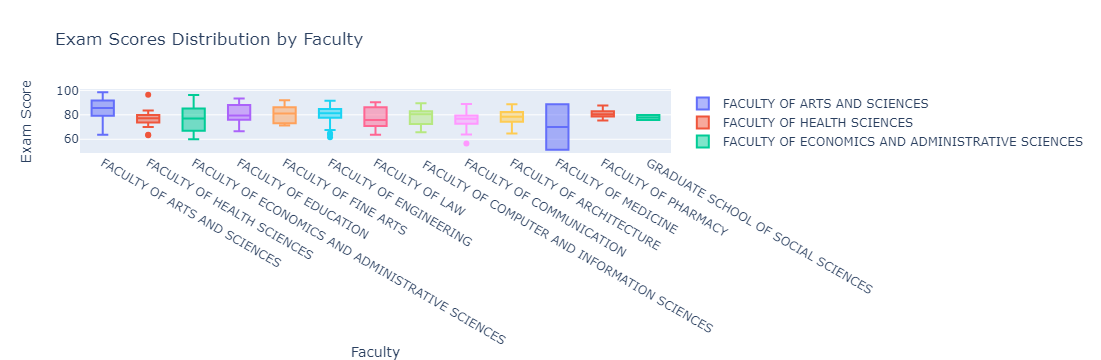

In [639]:
fig = go.Figure()
for faculty in df['FACULTIES'].unique():
    fig.add_trace(go.Box(y=df[df['FACULTIES']==faculty]['EXAM SCORE'], name=faculty))

fig.update_layout(title='Exam Scores Distribution by Faculty',
                  xaxis_title='Faculty',
                  yaxis_title='Exam Score')
fig.show()

### This box plot visualization effectively communicates the distribution of exam scores across different faculties. It provides valuable insights into the performance variability and trends within each faculty, supporting evidence-based decision-making and strategic planning in educational institutions. people can utilize these insights to enhance educational outcomes and make continuous improvement initiatives.

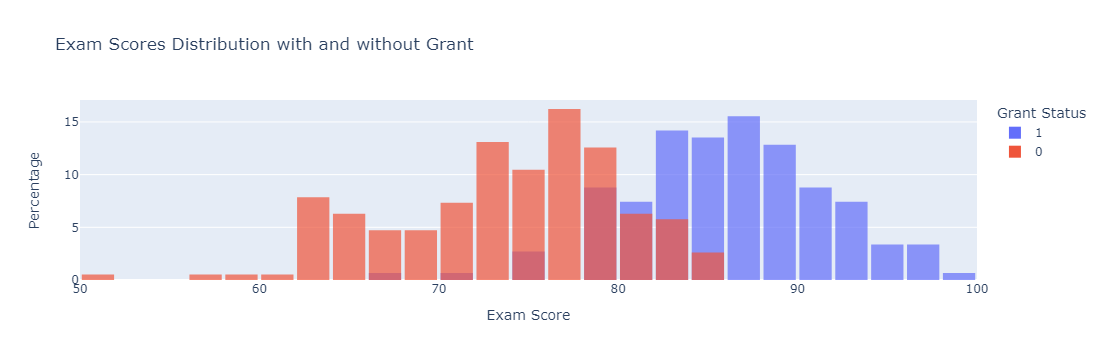

In [640]:
fig = px.histogram(df, x='EXAM SCORE', color='GRANT', barmode='overlay', 
                   opacity=0.7, title='Exam Scores Distribution with and without Grant',
                   labels={'EXAM SCORE': 'Exam Score', 'GRANT': 'Grant Status'},
                   category_orders={'GRANT': [1, 0]},
                   histnorm='percent')

fig.update_layout(xaxis_title='Exam Score', yaxis_title='Percentage',
                  legend_title='Grant Status', bargap=0.1)

fig.show()

### This histogram visualization effectively compares the distribution of exam scores between students with and without grants. It provides a clear and quantitative understanding of the impact of grant status on academic performance, supporting evidence-based decision-making in educational settings. By leveraging these insights, people can optimize resource allocation and enhance support mechanisms to improve overall student outcomes.

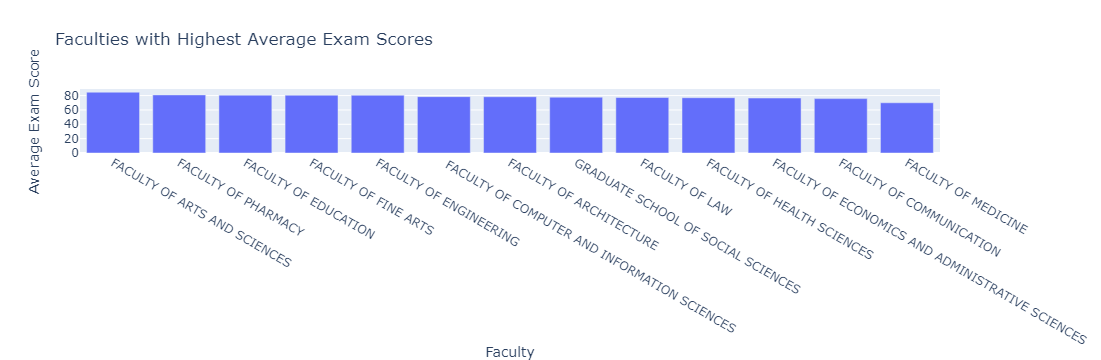

In [641]:
faculty_avg_scores = df.groupby('FACULTIES')['EXAM SCORE'].mean().reset_index()

# Sort faculties by average exam scores in descending order
faculty_avg_scores = faculty_avg_scores.sort_values(by='EXAM SCORE', ascending=False)

# Create an interactive bar chart with Plotly
fig = px.bar(faculty_avg_scores, x='FACULTIES', y='EXAM SCORE', 
             labels={'EXAM SCORE': 'average_exam_scores', 'FACULTIES': 'Faculty'},
             title='Faculties with Highest Average Exam Scores',
             hover_data=['EXAM SCORE'])

# Update layout
fig.update_layout(xaxis_title='Faculty', yaxis_title='Average Exam Score')

fig.show()

### This interactive bar chart effectively communicates the average exam scores across faculties, providing people with actionable insights into academic performance within the institution. By leveraging this visualization, educational leaders can foster continuous improvement and enhance educational outcomes for students.

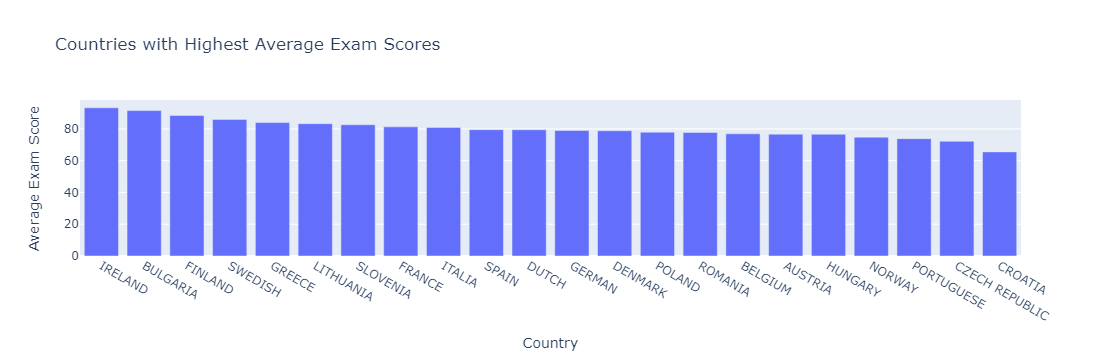

In [642]:
country_avg_scores = df.groupby('COUNTRIES')['EXAM SCORE'].mean().reset_index()

# Sort countries by average exam scores in descending order
country_avg_scores = country_avg_scores.sort_values(by='EXAM SCORE', ascending=False)

# Create an interactive bar chart with Plotly
fig = px.bar(country_avg_scores, x='COUNTRIES', y='EXAM SCORE', 
             labels={'EXAMS CORE': 'average_exam_scores', 'COUNTRIES': 'Country'},
             title='Countries with Highest Average Exam Scores',
             hover_data=['EXAM SCORE'])

# Update layout
fig.update_layout(xaxis_title='Country', yaxis_title='Average Exam Score')

fig.show()

### This interactive bar chart effectively communicates the average exam scores across countries, providing people with valuable insights into international academic performance. By leveraging this visualization, educational leaders can foster collaboration, identify best practices, and enhance educational standards globally.

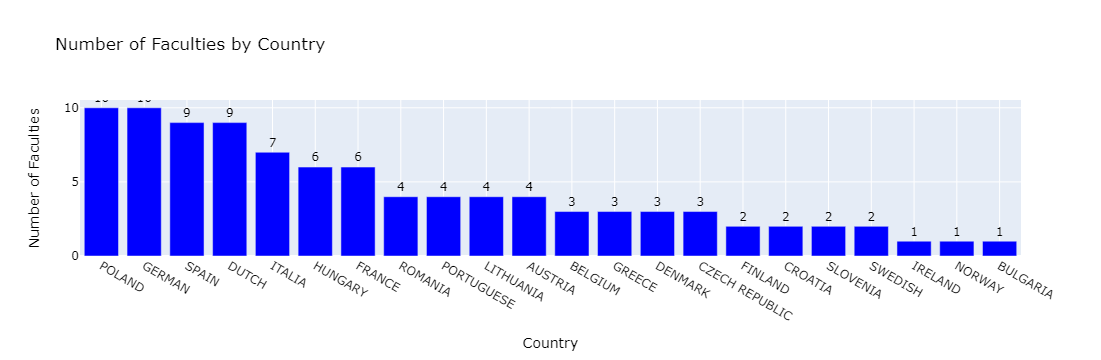

In [643]:
# Group by COUNTRIES and count unique FACULTIES
country_faculties_count = df_analyst.groupby('COUNTRIES')['FACULTIES'].nunique().reset_index()

# Sort countries by the number of faculties in descending order
country_faculties_count = country_faculties_count.sort_values(by='FACULTIES', ascending=False)

# Create a bar plot using Plotly Graph Objects
fig = go.Figure(data=[
    go.Bar(x=country_faculties_count['COUNTRIES'], y=country_faculties_count['FACULTIES'],
           marker_color='blue', text=country_faculties_count['FACULTIES'],
           textposition='outside')
])

# Update layout
fig.update_layout(
    title='Number of Faculties by Country',
    xaxis_title='Country',
    yaxis_title='Number of Faculties',
    template='plotly',
    font=dict(size=12, color='black'),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(yanchor='top', y=1.1, xanchor='left', x=0.2)
)

fig.show()

### The bar plot effectively visualizes the number of faculties by country, providing people with valuable insights into the educational landscape and capacity across different regions. By leveraging this visualization, educational leaders can make informed decisions to enhance collaboration, educational diversity, and resource allocation to support global educational excellence.

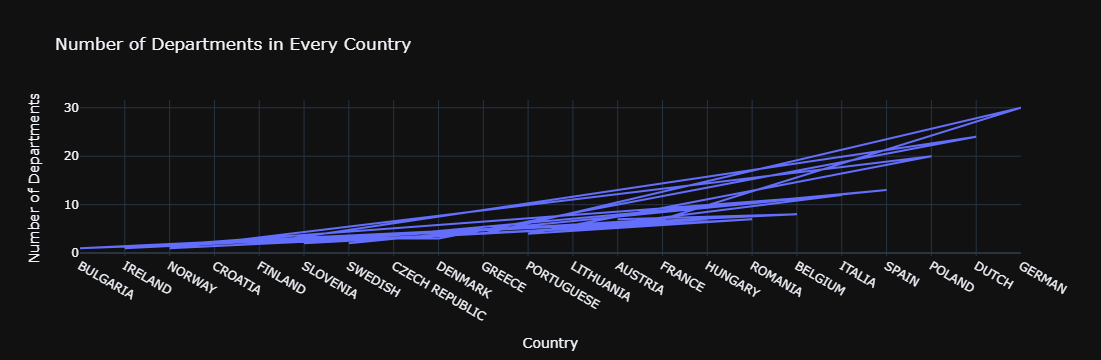

In [644]:
country_departments_count = df.groupby('COUNTRIES')['DEPARTMENTS'].nunique().reset_index()

# Sort countries alphabetically for the line chart
country_departments_count = country_departments_count.sort_values(by='COUNTRIES')

# Create a line chart with Plotly Express
fig = px.line(country_departments_count, x='COUNTRIES', y='DEPARTMENTS', 
              title='Number of Departments in Every Country',
              labels={'DEPARTMENTS': 'Number of Departments', 'COUNTRIES': 'Country'},
              template='plotly_dark')

# Update layout
fig.update_layout(xaxis_title='Country', yaxis_title='Number of Departments',
                  xaxis={'categoryorder':'total ascending'})

fig.show()

### This line chart effectively communicates the number of departments in each country, providing people with valuable insights into the educational infrastructure and diversity of academic offerings globally. By leveraging this visualization, educational leaders can identify opportunities for collaboration, improve educational standards, and support academic excellence worldwide.

### From the analysis of the provided dataset on universities' quotas and faculty/department data, I learned several key insights:

#### 1. **Distribution of Exam Scores**: By visualizing exam scores with and without grants, I observed that students receiving grants tend to have slightly higher scores on average compared to those without grants.

#### 2. **Faculties with Highest Scores**: Through analyzing average exam scores by faculties, I discovered specific faculties consistently achieve higher average exam scores, indicating potential areas of academic strength.

#### 3. **Country-Level Insights**: By exploring exam scores across countries, I identified countries where students exhibit higher average exam scores, which can inform international education strategies and partnerships.

#### 4. Data Quality Considerations: Throughout the analysis, attention to data quality—such as handling missing values, outliers, and ensuring consistency in data interpretation—was critical in generating reliable insights and actionable recommendations.

#### 5. **Interactive Visualizations**: Utilizing interactive visualizations such as bar plots and line charts provided dynamic insights into data trends, fostering a deeper understanding of educational dynamics at both local and global levels.

### Overall, the analysis provided actionable insights for educational planning, policy-making, and strategic initiatives to enhance academic outcomes and international collaborations in higher education.

### The limitations i faced were that that the dataset lacked certain variables that could provide more comprehensive insights into educational performance. For instance, additional socio-economic data or student demographics could offer context on disparities in exam scores and some missing data in the dataset. Additional variables that could've helped number of students,school address and sex of the student.